<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-07-12 21:48:50--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  58.0MB/s    in 3.5s    

2025-07-12 21:48:56 (58.1 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
# QUERY = "SELECT COUNT(*) FROM main"
# df = pd.read_sql_query(QUERY, conn)
# print(df)


#### Demo 2: List All Tables


In [6]:
# QUERY = """
# SELECT name as Table_Name 
# FROM sqlite_master 
# WHERE type = 'table'
# """
# pd.read_sql_query(QUERY, conn)

#### Demo 3: Group Data by Age


In [7]:
# QUERY = """
# SELECT Age, COUNT(*) as count 
# FROM main 
# GROUP BY Age 
# ORDER BY Age
# """
# df_age = pd.read_sql_query(QUERY, conn)
# print(df_age)

#### Load full dataframe

In [19]:
query_cols = "PRAGMA table_info(main);"
df_describe = pd.read_sql_query(query_cols, conn)
columns = df_describe["name"].tolist()
column_str = ", ".join([f'"{col}"' for col in columns])  # wrap in quotes in case of special names
query_data = f"SELECT {column_str} FROM main;"
df_full = pd.read_sql_query(query_data, conn)

In [25]:
# View result
# df_full.head()
#df_full["JobSatPoints_6"].value_counts()

## Visualizing Data


In [10]:
QUERY = """
SELECT Age,CompTotal,YearsCodePro,TimeSearching,DatabaseWantToWorkWith,RemoteWork,JobSat FROM main 
"""
df= pd.read_sql_query(QUERY, conn)

### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [14]:
#df['CompTotal'].isna().mean() * 100
#df['CompTotal'].value_counts()

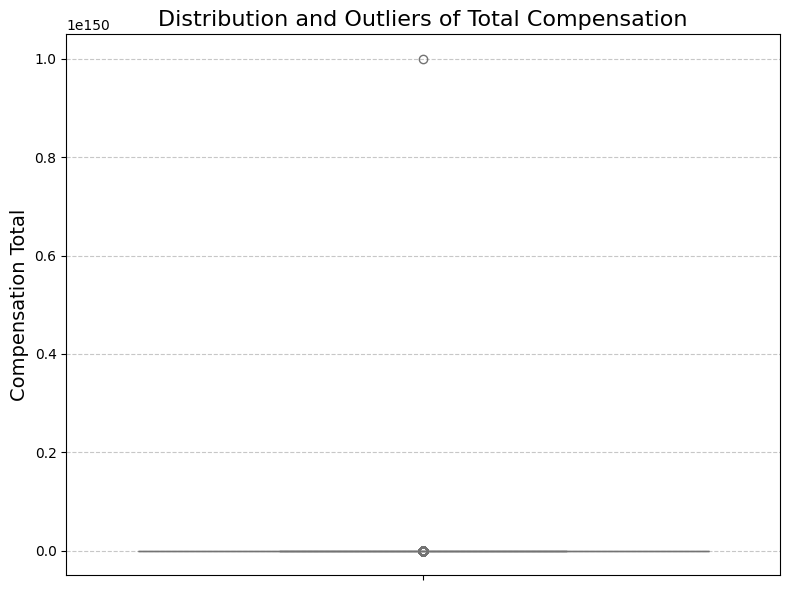

In [12]:
# your code goes here
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df.dropna(subset=['CompTotal'], inplace=True)
#df['CompTotal'].fillna(df['CompTotal'].median(), inplace=True) 

# Create the box plot for CompTotal
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['CompTotal'], color='lightgreen') # Using 'y' for a vertical box plot

plt.title('Distribution and Outliers of Total Compensation', fontsize=16)
plt.ylabel('Compensation Total', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


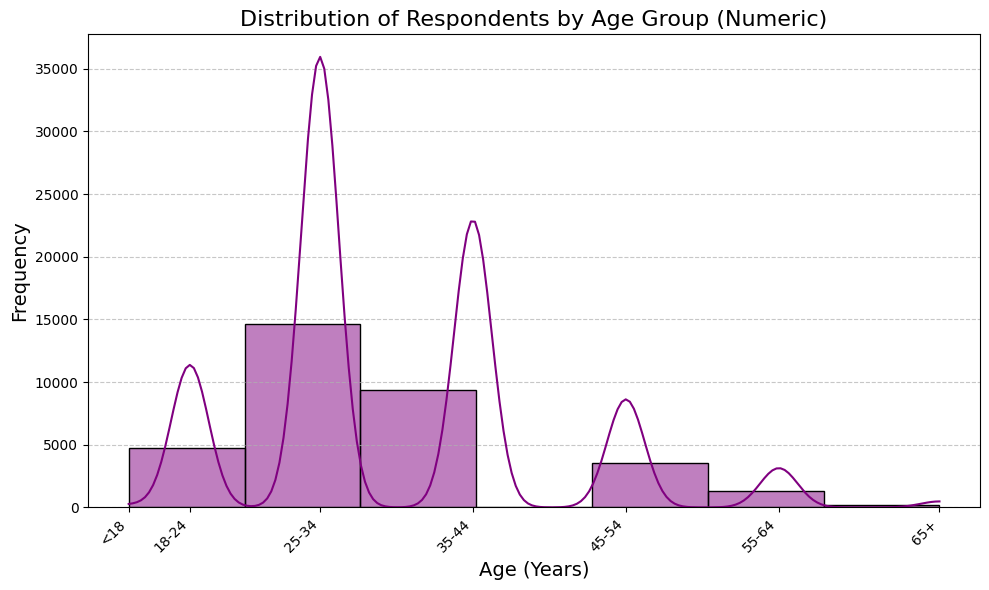

In [16]:
# your code goes here
#df['Age'].value_counts()

age_mapping = {
    'Under 18 years old': 17,  # Assuming a value representative of "Under 18"
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,   # Assuming a representative value for "65 or older"
    'Prefer not to say': float('nan') # Treat 'Prefer not to say' as NaN
}

# Convert the 'Age' column using the mapping
df['Age_Numeric'] = df['Age'].map(age_mapping)

# Drop rows where Age_Numeric is NaN (i.e., 'Prefer not to say' entries) for visualization
df_cleaned = df.dropna(subset=['Age_Numeric']).copy()

# Visualize the distribution of the numerical Age column using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Age_Numeric'], bins=7, kde=True, color='purple') # Adjust bins for categories

plt.title('Distribution of Respondents by Age Group (Numeric)', fontsize=16)
plt.xlabel('Age (Years)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(
    ticks=[17, 21, 29.5, 39.5, 49.5, 59.5, 70],
    labels=['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'],
    rotation=45, ha='right'
)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


/tmp/ipykernel_1132/291939913.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Age', y='CompTotal', palette='Set2')


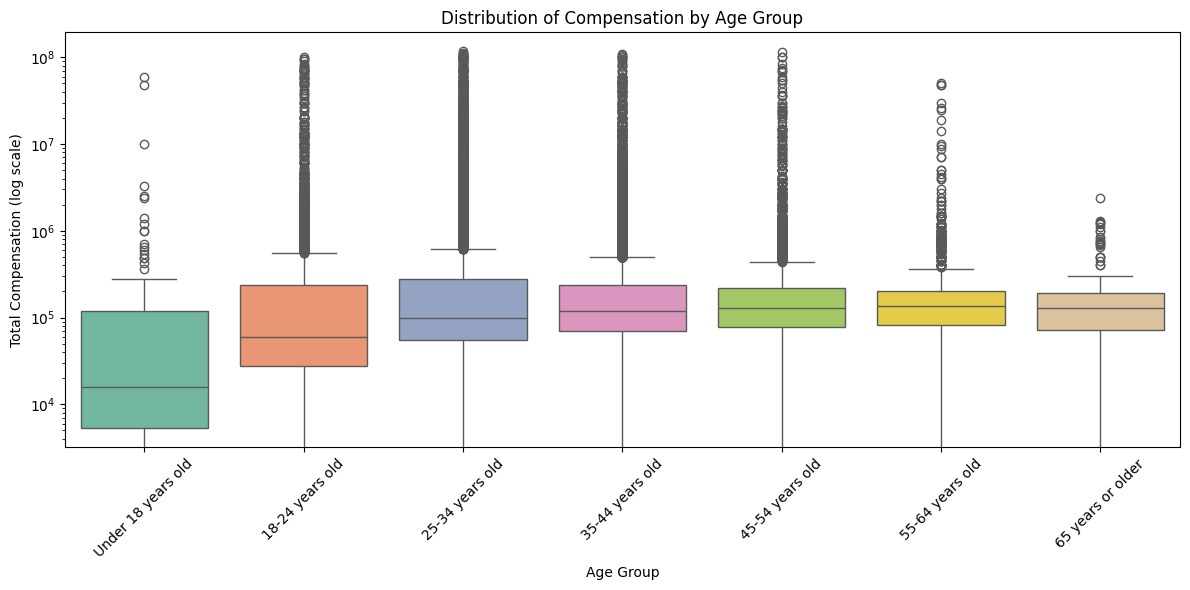

In [17]:
# your code goes here
# Step 1: Clean data
df_clean = df[['Age', 'CompTotal']].dropna()

# Optional: Remove extreme outliers (top 1% compensation)
upper_limit = df_clean['CompTotal'].quantile(0.99)
df_clean = df_clean[df_clean['CompTotal'] <= upper_limit]

# Optional: Sort age categories manually for logical order
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old',
    '45-54 years old', '55-64 years old', '65 years or older'
]
df_clean = df_clean[df_clean['Age'].isin(age_order)]
df_clean['Age'] = pd.Categorical(df_clean['Age'], categories=age_order, ordered=True)

# Step 2: Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='Age', y='CompTotal', palette='Set2')
plt.yscale('log')  # Helps handle skewed compensation data
plt.title('Distribution of Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation (log scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


/tmp/ipykernel_1132/699807899.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='JobSatPoints_6', y='CompTotal', palette='coolwarm')


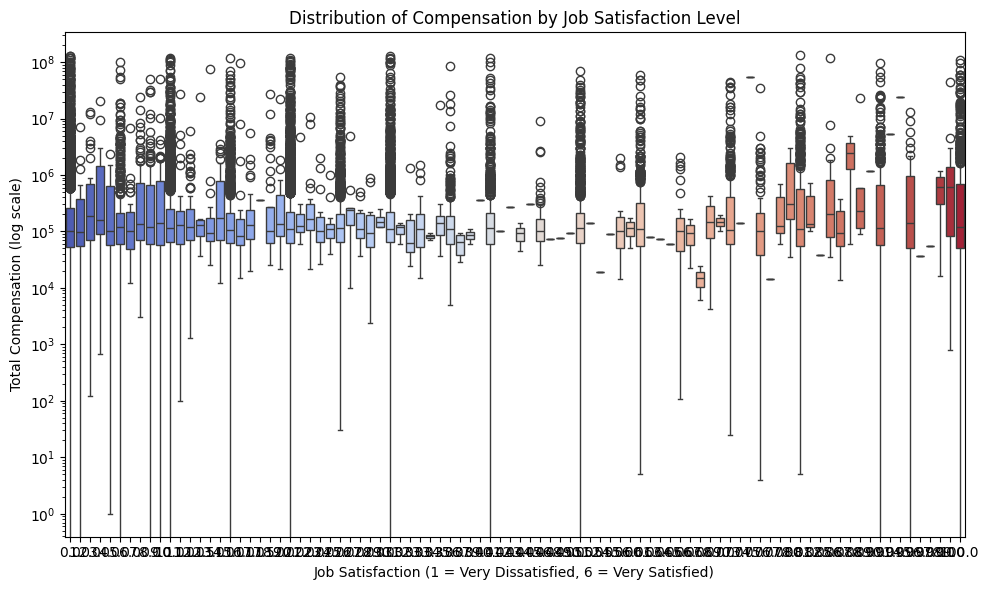

In [26]:
# your code goes here
# df["JobSatpoints"].value_counts()
# Step 1: Drop rows with missing values in either column
df_plot = df_full[['CompTotal', 'JobSatPoints_6']].dropna()

# Step 2: Optionally remove outliers (e.g., top 1%) to avoid skew
upper_limit = df_plot['CompTotal'].quantile(0.99)
df_plot = df_plot[df_plot['CompTotal'] <= upper_limit]

# Step 3: Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_plot, x='JobSatPoints_6', y='CompTotal', palette='coolwarm')

# Optional: log scale to handle skew
plt.yscale('log')

# Titles and labels
plt.title('Distribution of Compensation by Job Satisfaction Level')
plt.xlabel('Job Satisfaction (1 = Very Dissatisfied, 6 = Very Satisfied)')
plt.ylabel('Total Compensation (log scale)')
plt.tight_layout()
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


/tmp/ipykernel_1132/3245492926.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_dev, x='DevType', y='ConvertedCompYearly', palette='Set3')


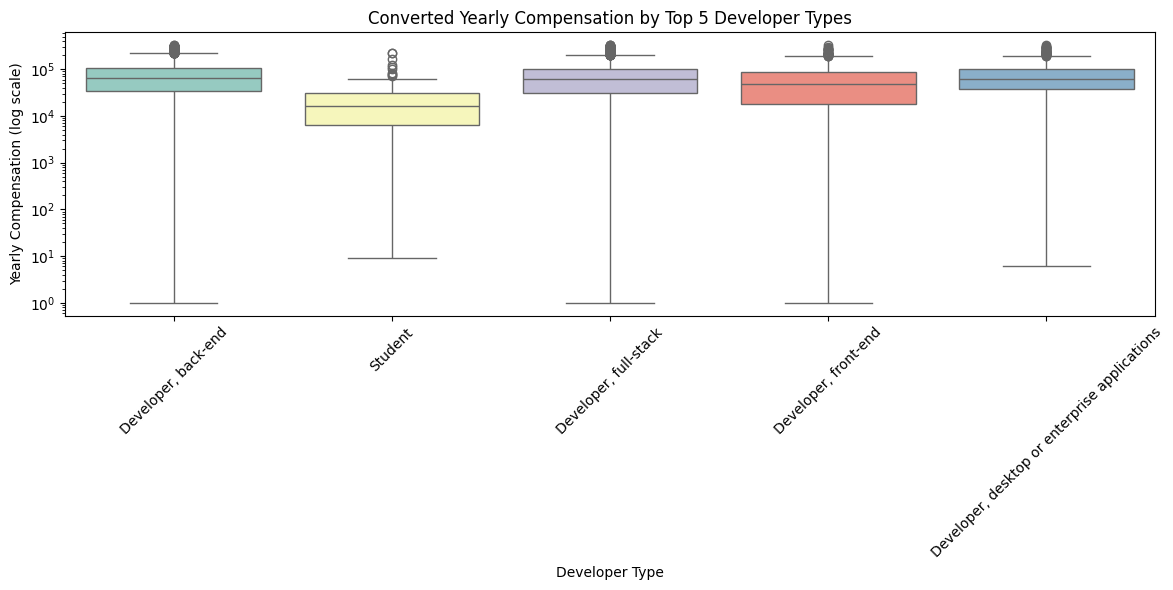

In [27]:
# your code goes here
top_dev_types = (
    df_full['DevType']
    .value_counts()
    .head(5)
    .index.tolist()
)

# Step 2: Filter data to include only those top 5
df_top_dev = df_full[df_full['DevType'].isin(top_dev_types)][['DevType', 'ConvertedCompYearly']].dropna()

# Step 3: Optional - remove top 1% compensation outliers for clarity
upper_limit = df_top_dev['ConvertedCompYearly'].quantile(0.99)
df_top_dev = df_top_dev[df_top_dev['ConvertedCompYearly'] <= upper_limit]

# Step 4: Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_dev, x='DevType', y='ConvertedCompYearly', palette='Set3')
plt.yscale('log')
plt.title('Converted Yearly Compensation by Top 5 Developer Types')
plt.xlabel('Developer Type')
plt.ylabel('Yearly Compensation (log scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


/tmp/ipykernel_1132/429226331.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_countries, x='Country', y='CompTotal', palette='pastel')


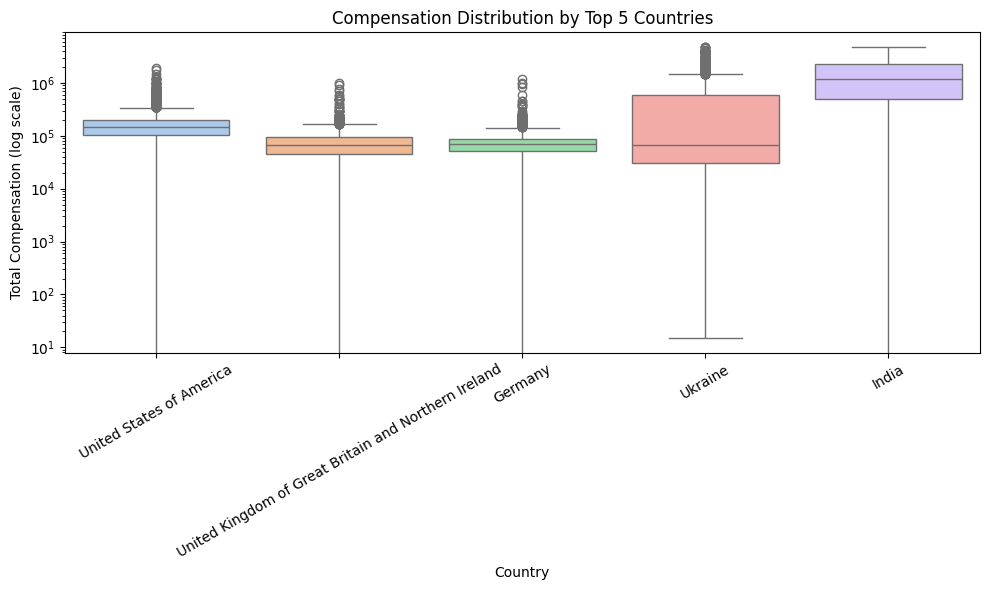

In [28]:
# your code goes here 
# Step 1: Identify top 5 countries by frequency
top_countries = (
    df_full['Country']
    .value_counts()
    .head(5)
    .index.tolist()
)

# Step 2: Filter dataset
df_top_countries = df_full[df_full['Country'].isin(top_countries)][['Country', 'CompTotal']].dropna()

# Step 3: Optional - remove extreme outliers (top 1%)
upper_limit = df_top_countries['CompTotal'].quantile(0.99)
df_top_countries = df_top_countries[df_top_countries['CompTotal'] <= upper_limit]

# Step 4: Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_top_countries, x='Country', y='CompTotal', palette='pastel')
plt.yscale('log')  # Handle skewed compensation distribution

# Final touches
plt.title('Compensation Distribution by Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Total Compensation (log scale)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


In [ ]:
# your code goes here

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [ ]:
# your code goes here

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
